# Heat Pump Simulation

The simulation of the heat pump model is performed in a separate script `heat_pump_simulation.py`. In the simulation the performance of the heat pump was determined at four different outdoor air temperatures: 12 °C, 7 °C, 2 °C, and -3 °C, while other operating conditions remain unaltered. The influence of evaporator frosting on heat pump performance is not included in the model.

The results of the simulation were saved on disk in a "shelf". In this notebook these simulation results are now analyzed.

In [1]:
import shelve

from hvac import Quantity
from hvac.charts import LineChart

Q_ = Quantity

## Fixed Operating Conditions

- mass flow rate of outdoor air: 1171.439 kg/h
- mass flow rate of indoor air: 1157.631 kg/h
- indoor air: 20 °C, 50 % RH
- compressor speed: 1358 rpm
- degree of superheating: 8 K

Retrieve the simulation outputs from the shelf:

In [2]:
path = "./heat_pump_rating"
outputs = None
with shelve.open(path) as shelf:
    outputs = {k:v for k, v in shelf.items()}

## Heating Capacity & Compressor Power

In [3]:
rng_T_ext = []
rng_cnd_Q_dot = []
rng_cmp_W_dot = []
for output in outputs.values():
    rng_T_ext.append(output.evp_air_in.Tdb.to('degC').m)
    rng_cnd_Q_dot.append(output.cnd_Q_dot.to('kW').m)
    rng_cmp_W_dot.append(output.cmp_W_dot.to('kW').m)

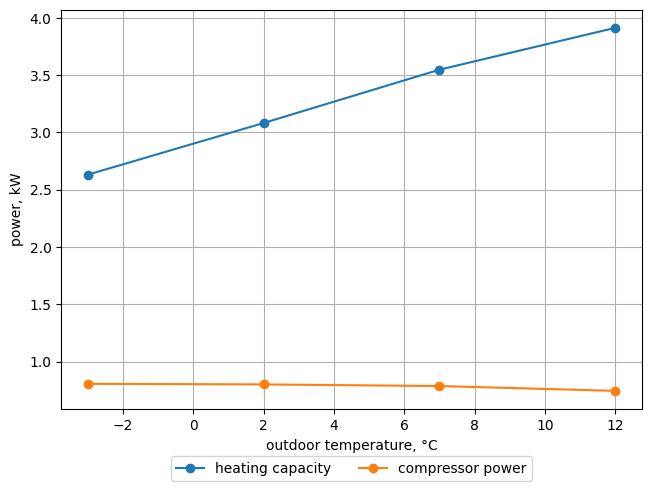

In [4]:
chart = LineChart()
chart.add_xy_data(
    label="heating capacity",
    x1_values=rng_T_ext,
    y1_values=rng_cnd_Q_dot,
    style_props={"marker": "o"}
)
chart.add_xy_data(
    label="compressor power",
    x1_values=rng_T_ext,
    y1_values=rng_cmp_W_dot,
    style_props={"marker": "o"}
)
chart.x1.add_title("outdoor temperature, °C")
chart.y1.add_title("power, kW")
chart.add_legend(columns=2)
chart.show()

## Coefficient of Performance (COP)

In [5]:
rng_COP = [output.COP.to('frac').m for output in outputs.values()]

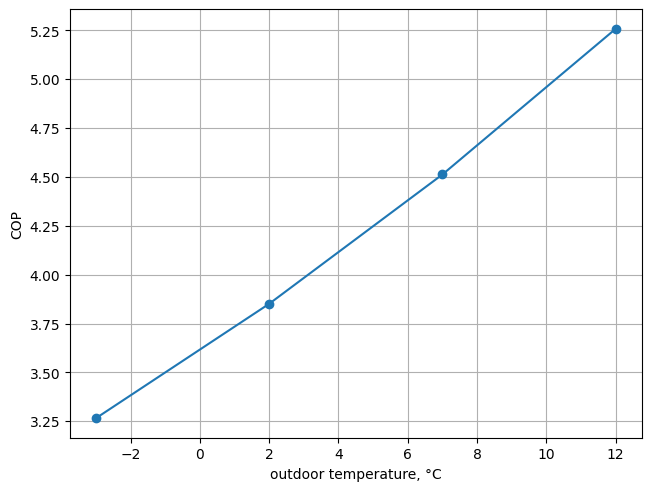

In [6]:
chart = LineChart()
chart.add_xy_data(
    label="COP",
    x1_values=rng_T_ext,
    y1_values=rng_COP,
    style_props={"marker": "o"}
)
chart.x1.add_title("outdoor temperature, °C")
chart.y1.add_title("COP")
chart.show()

## Evaporating and Condensing Temperatures

In [7]:
rng_T_evp, rng_T_cnd = [], []
for output in outputs.values():
    rng_T_evp.append(output.T_evp.to('degC').m)
    rng_T_cnd.append(output.T_cnd.to('degC').m)


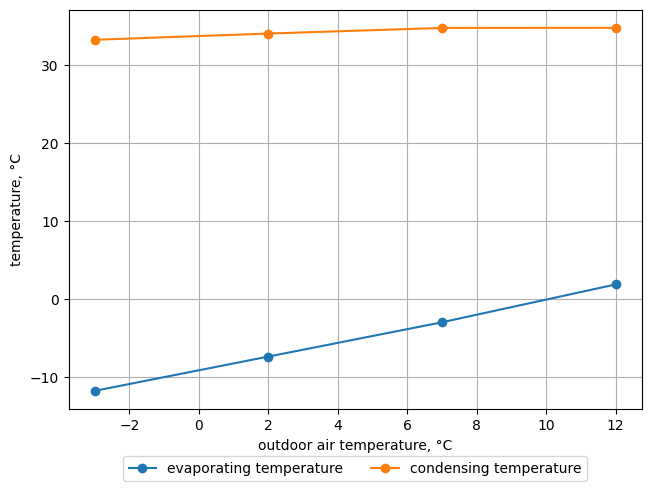

In [8]:
chart = LineChart()
chart.add_xy_data(
    label="evaporating temperature",
    x1_values=rng_T_ext,
    y1_values=rng_T_evp,
    style_props={"marker": "o"}
)
chart.add_xy_data(
    label="condensing temperature",
    x1_values=rng_T_ext,
    y1_values=rng_T_cnd,
    style_props={"marker": "o"}
)
chart.x1.add_title("outdoor air temperature, °C")
chart.y1.add_title("temperature, °C")
chart.add_legend()
chart.show()

## Mass Flow Rate of Refrigerant

In [10]:
rng_rfg_m_dot = [output.rfg_m_dot.to('kg/h').m for output in outputs.values()]

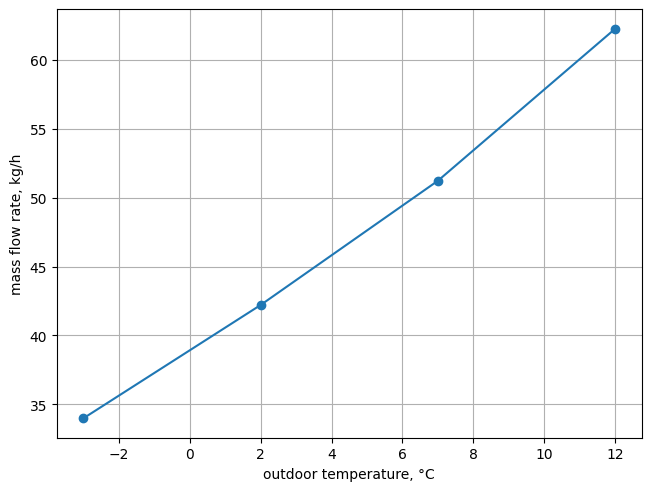

In [11]:
chart = LineChart()
chart.add_xy_data(
    label="refrigerant mass flow rate",
    x1_values=rng_T_ext,
    y1_values=rng_rfg_m_dot,
    style_props={"marker": "o"}
)
chart.x1.add_title("outdoor temperature, °C")
chart.y1.add_title("refrigerant mass flow rate, kg/h")
chart.show()

## Discharge Gas Temperature

In [12]:
rng_rfg_T_dis = [output.discharge_gas.T.to('degC').m for output in outputs.values()]

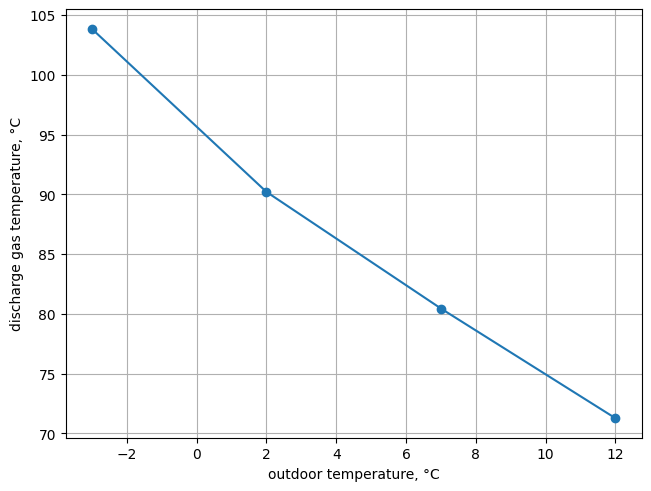

In [13]:
chart = LineChart()
chart.add_xy_data(
    label="discharge gas temperature",
    x1_values=rng_T_ext,
    y1_values=rng_rfg_T_dis,
    style_props={"marker": "o"}
)
chart.x1.add_title("outdoor temperature, °C")
chart.y1.add_title("discharge gas temperature, °C")
chart.show()